<a href="https://colab.research.google.com/github/hfznj20/Tugas_avd_221031015/blob/main/UTS_AVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study Unsupervised Learning Menggunakan Dataset Film.csv**

**Langkah 1: Setup & Load Data**

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True) # Force remount to ensure access

# Load data
file_path = '/content/drive/MyDrive/film.csv'  # Verify this path is correct
df = pd.read_csv(file_path)

# Tampilkan 5 data pertama
df.head()

Mounted at /content/drive


,tconst,primaryTitle,startYear,endYear,rank,averageRating,numVotes,directors,writers,genres,IMDbLink,Title_IMDb_Link
0,tt0903747,Breaking Bad,2008,2013.0,1,9.5,2313754,"Michelle MacLaren, Adam Bernstein, Vince Gilli...","Vince Gilligan, Peter Gould, George Mastras, S...","Crime, Drama, Thriller","<a href=""https://www.imdb.com/title/tt0903747""...","<a href=""https://www.imdb.com/title/tt0903747""..."
1,tt0185906,Band of Brothers,2001,2001.0,2,9.4,559333,"David Frankel, Mikael Salomon, Tom Hanks, Davi...","Stephen Ambrose, Erik Bork, E. Max Frye, Tom H...","Action, Drama, History","<a href=""https://www.imdb.com/title/tt0185906""...","<a href=""https://www.imdb.com/title/tt0185906""..."
2,tt7366338,Chernobyl,2019,2019.0,3,9.3,942685,Johan Renck,Craig Mazin,"Drama, History, Thriller","<a href=""https://www.imdb.com/title/tt7366338""...","<a href=""https://www.imdb.com/title/tt7366338""..."
3,tt0795176,Planet Earth,2006,2006.0,4,9.4,226942,"Alastair Fothergill, Mark Linfield","David Attenborough, Vanessa Berlowitz, Alastai...","Documentary, Family","<a href=""https://www.imdb.com/title/tt0795176""...","<a href=""https://www.imdb.com/title/tt0795176""..."
4,tt5491994,Planet Earth II,2016,2016.0,5,9.4,166009,"Justin Anderson, Ed Charles, Fredi Devas, Chad...",Elizabeth White,Documentary,"<a href=""https://www.imdb.com/title/tt5491994""...","<a href=""https://www.imdb.com/title/tt5491994""..."


**Langkah 2: Cek dan Bersihkan Data**

In [8]:
# Cek info kolom
print(df.info())

# Pilih hanya kolom numerik yang relevan untuk clustering
df_clean = df[['averageRating', 'numVotes', 'startYear', 'rank']].copy()

# Hapus baris yang mengandung nilai kosong
df_clean = df_clean.dropna()

# Standarisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clean)

# Lihat hasil normalisasi
pd.DataFrame(data_scaled, columns=df_clean.columns).head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           5000 non-null   object 
 1   primaryTitle     5000 non-null   object 
 2   startYear        5000 non-null   int64  
 3   endYear          4119 non-null   float64
 4   rank             5000 non-null   int64  
 5   averageRating    5000 non-null   float64
 6   numVotes         5000 non-null   int64  
 7   directors        5000 non-null   object 
 8   writers          5000 non-null   object 
 9   genres           5000 non-null   object 
 10  IMDbLink         5000 non-null   object 
 11  Title_IMDb_Link  5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB
None


,averageRating,numVotes,startYear,rank
0,3.413460,25.325920,-0.063722,-1.731704
1,3.185312,5.894217,-0.550896,-1.731012
2,2.957164,10.140166,0.701836,-1.730319
3,3.185312,2.212704,-0.202915,-1.729626
4,3.185312,1.537819,0.493048,-1.728933


**Langkah 3: Tentukan Jumlah Cluster (Elbow Method)**

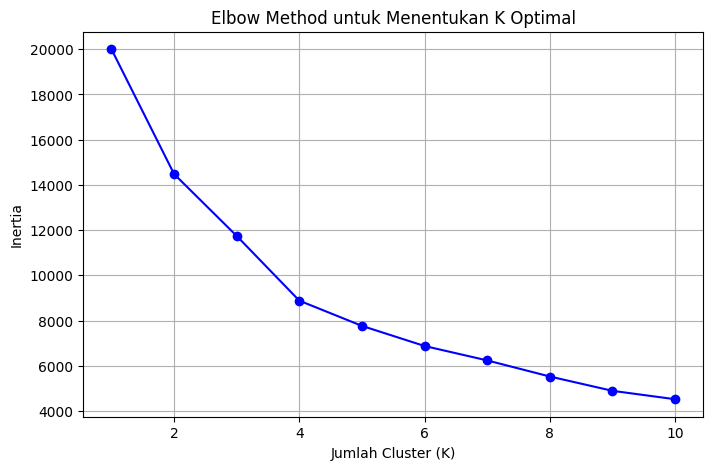

In [9]:
# Uji K dari 1 sampai 10
inertia = []
K_range = range(1, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_scaled)
    inertia.append(model.inertia_)

# Plot Elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.grid(True)
plt.show()


**Langkah 4: Buat Model KMeans dan Klasterisasi**

In [10]:
# Misal dari Elbow terlihat optimal di K=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(data_scaled)

# Lihat jumlah data di setiap cluster
print(df_clean['cluster'].value_counts())


cluster
1    2815
0    2116
2      69
Name: count, dtype: int64


**Langkah 5: Visualisasi Cluster dengan PCA**

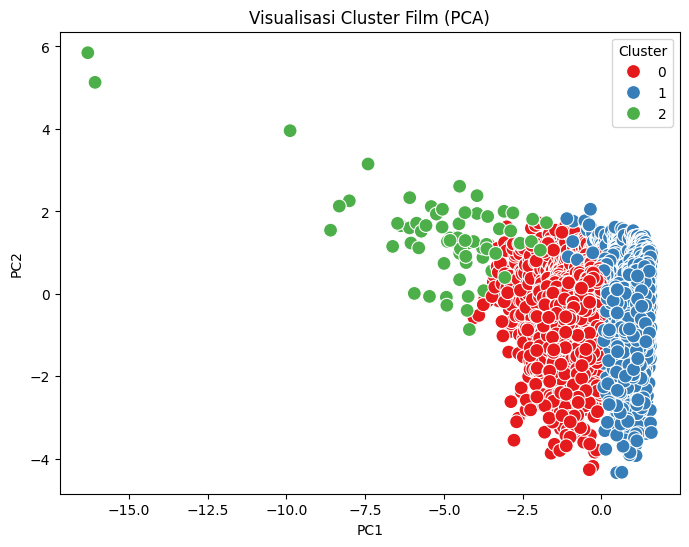

In [14]:
# Reduksi dimensi untuk visualisasi (2D)
from sklearn.decomposition import PCA # Import PCA from sklearn.decomposition
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Buat DataFrame hasil PCA + cluster
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_clean['cluster']

# Visualisasi
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100)
plt.title('Visualisasi Cluster Film (PCA)')
plt.show()

**Langkah 6: Interpretasi & Kesimpulan**

In [15]:
# Lihat rata-rata tiap fitur per cluster
cluster_summary = df_clean.groupby('cluster').mean()
print(cluster_summary)

         averageRating       numVotes    startYear         rank
cluster                                                        
0             8.322732   33227.935255  2008.595463  1247.047259
1             7.750693    8405.914387  2009.095915  3498.717584
2             8.552174  606525.840580  2011.376812   215.333333


🧠 Interpretasi Setiap Cluster
✅ Cluster 2 (Eksklusif & Populer)

    Jumlah film paling sedikit (69) → ini bisa dianggap sebagai "film elit".

    Rata-rata rating tertinggi: 8.55

    Jumlah voting jauh lebih banyak dari yang lain: lebih dari 600 ribu

    Rank film sangat tinggi (semakin kecil berarti semakin bagus): rata-rata 215

    Biasanya film-film di cluster ini adalah acclaimed seperti Breaking Bad, Chernobyl, Band of Brothers.

⚙️ Cluster 0 (Menengah-Atas)

    Rating cukup tinggi: 8.32

    Jumlah voting juga lumayan tinggi (33 ribu)

    Rank lumayan bagus: 1247

    Umumnya berisi film bagus tapi tidak seterkenal cluster 2.

🧩 Cluster 1 (Film Rata-rata)

    Rating paling rendah: 7.75

    Jumlah voting juga paling sedikit: hanya sekitar 8 ribu

    Rank paling rendah (semakin besar nilainya, makin rendah kualitas atau popularitasnya)

    Jumlah film paling banyak

Kesimpulan Umum

    KMeans berhasil membagi film ke dalam 3 kelompok utama berdasarkan popularitas dan kualitas.

    Cluster 2 berisi film-film luar biasa populer dan disukai, sangat sedikit jumlahnya (film elite).

    Cluster 0 menampung film-film menengah atas, cukup berkualitas dan punya penggemar.

    Cluster 1 terdiri dari film-film biasa saja, paling banyak jumlahnya.